In [17]:
import sike
import numpy as np

Initialising the impurity species to be modelled...
 Initialising states...
 Initialising transitions...
  Loading transitions from json...
  Creating transition objects...
  Creating data for inverse transitions...
  Performing checks on transition data...
 Initialising densities...
 Finalising states...
Finished initialising impurity species objects.
Filling transition matrix for Neon
 100.0%
Evolving evolution equations...

Conservation check on rank 0: 1.69e-10
Done.


<Axes: title={'center': 'Density profiles per ionization stage: Ne'}, xlabel='$T_e$ [eV]', ylabel='Density [m$^{-3}$]'>

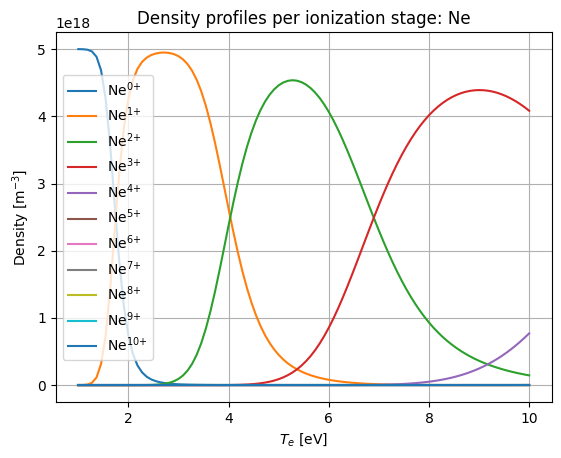

In [18]:
# 1. Initialise with electron temperature and density profiles
nx = 100
Te = np.linspace(1, 10, nx)
ne = 1e20 * np.ones(nx)

c = sike.SIKERun(Te=Te, ne=ne, element="Ne")
ds = c.evolve(dt_s=1e0)

sike.plotting.plot_nz(ds)

Using default velocity grid.
Using default velocity grid.
Initialising the impurity species to be modelled...
 Initialising states...
 Initialising transitions...
  Loading transitions from json...
  Creating transition objects...
  Creating data for inverse transitions...
  Performing checks on transition data...
 Initialising densities...
 Finalising states...
Finished initialising impurity species objects.
Filling transition matrix for Neon
 100.0%
Evolving evolution equations...

Conservation check on rank 0: -9.72e-11
Done.


<Axes: title={'center': 'Density profiles per ionization stage: Ne'}, xlabel='$T_e$ [eV]', ylabel='Density [m$^{-3}$]'>

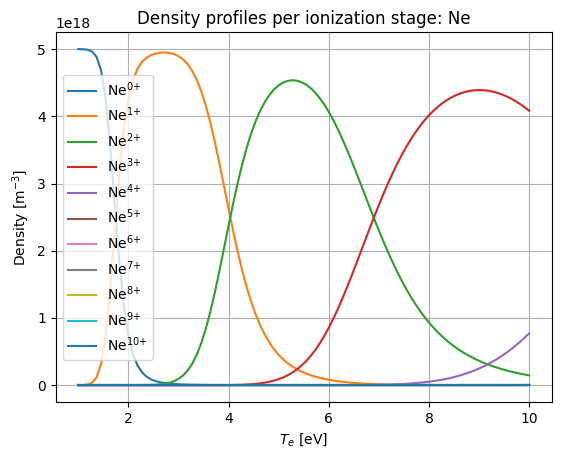

In [19]:
# 2. Initialise with electron distributions
nx = 100
Te = np.linspace(1, 10, nx)
ne = 1e20 * np.ones(nx)

fe = sike.get_maxwellians(ne=ne, Te=Te)

c = sike.SIKERun(fe=fe, element="Ne")
ds = c.evolve(dt_s=1e0)

sike.plotting.plot_nz(ds)

Using default velocity grid.
Using default velocity grid.
Initialising the impurity species to be modelled...
 Initialising states...
 Initialising transitions...
  Loading transitions from json...
  Creating transition objects...
  Creating data for inverse transitions...
  Performing checks on transition data...
 Initialising densities...
 Finalising states...
Finished initialising impurity species objects.
Filling transition matrix for Neon
 100.0%
Evolving evolution equations...

Conservation check on rank 0: 1.28e-11
Done.
Initialising the impurity species to be modelled...
 Initialising states...
 Initialising transitions...
  Loading transitions from json...
  Creating transition objects...
  Creating data for inverse transitions...
  Performing checks on transition data...
 Initialising densities...
 Finalising states...
Finished initialising impurity species objects.
Filling transition matrix for Neon
 100.0%
Evolving evolution equations...

Conservation check on rank 0: 3.04e

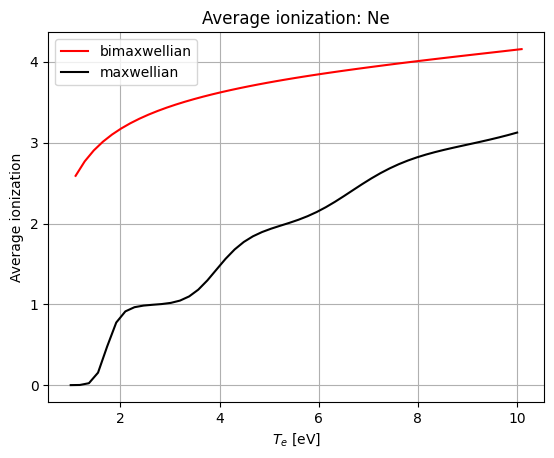

In [25]:
# 3. Initialise with bi-Maxwellian electron distributions and compare to Maxwellians
nx = 50
Te = np.linspace(1, 10, nx)
ne = 1e20 * np.ones(nx)
Thot = 100 * np.ones(nx)

el = "Ne"
hot_frac = 0.001
fe = sike.get_bimaxwellians(
    n1=hot_frac * ne, n2=(1 - hot_frac) * ne, T1=Thot, T2=Te, normalised=False
)
c_bm = sike.SIKERun(fe=fe, element=el)
ds_bm = c_bm.evolve(dt_s=1e0)
c_m = sike.SIKERun(Te=Te, ne=ne, element=el)
ds_m = c_m.evolve(dt_s=1e0)

ax = sike.plotting.plot_Zavg(ds_bm, color="red", label="bimaxwellian")
sike.plotting.plot_Zavg(ds_m, color="black", ax=ax, label="maxwellian")
ax.legend()
ax.grid()

Initialising the impurity species to be modelled...
 Initialising states...
 Initialising transitions...
  Loading transitions from json...
  Creating transition objects...
  Creating data for inverse transitions...
  Performing checks on transition data...
 Initialising densities...
 Finalising states...
Finished initialising impurity species objects.
Filling transition matrix for Lithium
 100.0%
Evolving evolution equations...

Conservation check on rank 0: -1.42e-14
Done.
Evolving evolution equations...

Conservation check on rank 0: 1.26e-06
Done.


<Axes: title={'center': 'Density profiles per ionization stage: Li'}, xlabel='$T_e$ [eV]', ylabel='Density [m$^{-3}$]'>

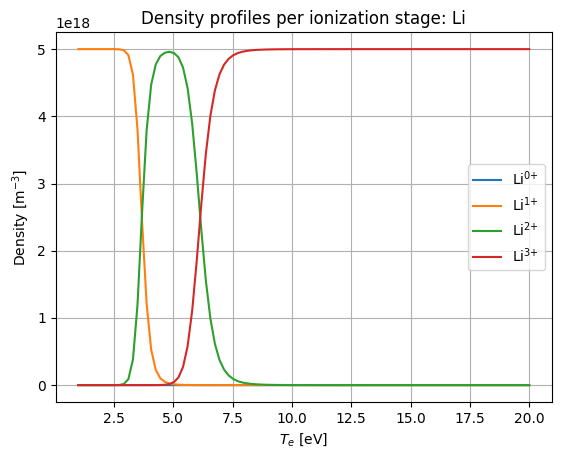

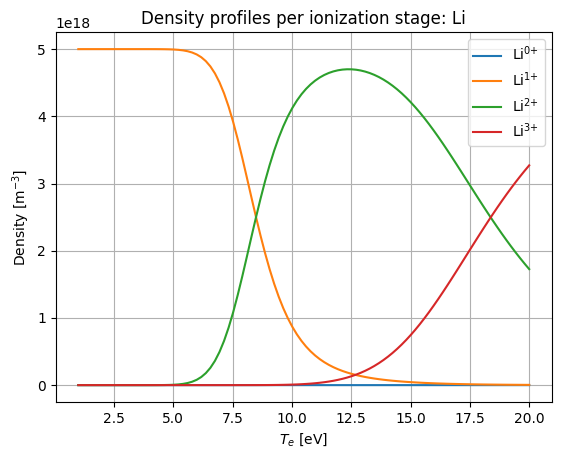

In [21]:
# 4. Use the evolve method to advance the solution a set timestep
nx = 100
Te = np.linspace(1, 20, nx)
ne = 1e20 * np.ones(nx)

c = sike.SIKERun(Te=Te, ne=ne, element="Li", saha_boltzmann_init=True)

ds = c.evolve(dt_s=1e-8)
sike.plotting.plot_nz(ds)

ds = c.evolve(dt_s=1e3)
sike.plotting.plot_nz(ds)

Initialising the impurity species to be modelled...
 Initialising states...
 Initialising transitions...
  Loading transitions from json...
  Creating transition objects...
  Creating data for inverse transitions...
  Performing checks on transition data...
 Initialising densities...
 Finalising states...
Finished initialising impurity species objects.
Filling transition matrix for Carbon
 100.0%
Evolving evolution equations...

Conservation check on rank 0: 1.12e-07
Done.


(1e-39, 2e-37)

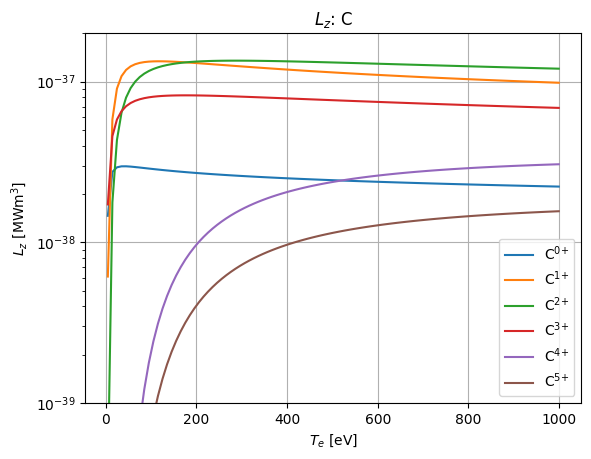

In [22]:
# 5. Use a custom velocity grid
Emin = 1e-5
Emax = 1e8
nv = 1000
vgrid, Egrid = sike.generate_vgrid(Emin=Emin, Emax=Emax, spacing="log")

nx = 100
Te = np.linspace(5, 1000, nx)
ne = 1e20 * np.ones(nx)

hot_frac = 0.001
fe = sike.get_bimaxwellians(
    n1=hot_frac * ne, n2=(1 - hot_frac) * ne, T1=50 * np.ones(nx), T2=Te, Egrid=Egrid
)

c = sike.SIKERun(fe=fe, vgrid=vgrid, element="C")
ds = c.evolve(dt_s=1e3)

ax = sike.plotting.plot_Lz(ds)
ax.set_ylim([1e-39, 2e-37])

Initialising the impurity species to be modelled...
 Initialising states...
 Initialising transitions...
  Loading transitions from json...
  Creating transition objects...
  Creating data for inverse transitions...
  Performing checks on transition data...
 Initialising densities...
 Finalising states...
Finished initialising impurity species objects.
Filling transition matrix for Neon
 100.0%
Conservation check: 1.42e-14


<Axes: title={'center': '$\\bar{L}_{z}$: Ne'}, xlabel='$T_e$ [eV]', ylabel='$\\bar{L}_{z}$ [MWm$^{3}$]'>

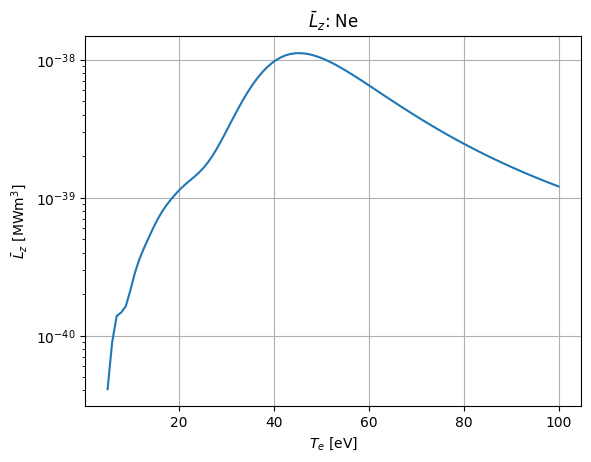

In [23]:
# 6. Plot the radiated power from excitation, averaged across charge states
nx = 100
Te = np.linspace(5, 100, nx)
ne = 1e20 * np.ones(nx)

c = sike.SIKERun(Te=Te, ne=ne, element="Ne")
ds = c.solve()

sike.plotting.plot_Lz_avg(ds)

Initialising the impurity species to be modelled...
 Initialising states...
 Initialising transitions...
  Loading transitions from json...
  Creating transition objects...
  Creating data for inverse transitions...
  Performing checks on transition data...
 Initialising densities...
 Finalising states...
Finished initialising impurity species objects.
Filling transition matrix for Carbon
 100.0%
Conservation check: 0.00e+00
Filling transition matrix for Carbon
 100.0%
Evolving evolution equations...

Conservation check on rank 0: 2.98e-13
Done.


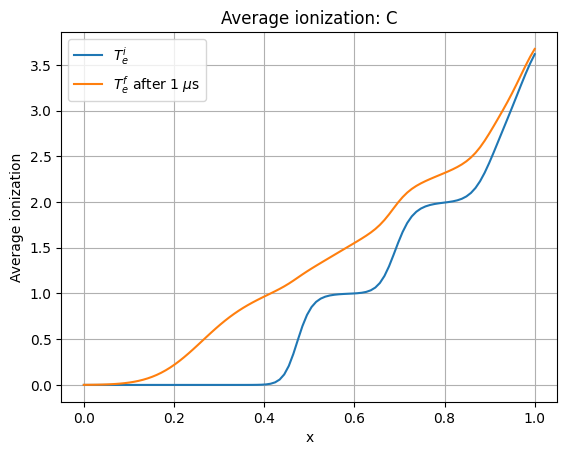

In [32]:
# 7. Update plasma profiles and advance the SIKE solution by a given dt

# The final Te is 10x initial Te
nx = 100
Te_i = np.logspace(-1, 1, nx)
ne_i = 1e20 * np.ones(nx)
Te_f = 10 * Te_i.copy()
ne_f = ne_i

# Initialise the SIKE object for a given impurity species
c = sike.SIKERun(Te=Te_i, ne=ne_i, element="C")
ds_i = c.solve()
ax = sike.plotting.plot_Zavg(ds_i, label="$T_e^i$", xaxis="x")

# Advance by 1us
c.update_profiles(Te=Te_f, ne=ne_f)
ds_new = c.evolve(1e-6)
sike.plotting.plot_Zavg(ds_new, ax=ax, label="$T_e^f$ after 1 $\mu$s", xaxis="x")
ax.grid(True)